In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("titanic_train.csv")#the famous titanic dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

<AxesSubplot:xlabel='Survived', ylabel='count'>

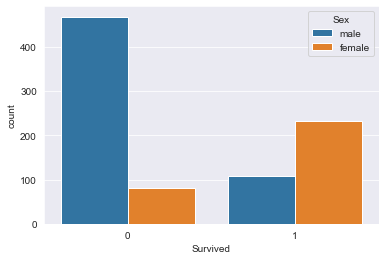

In [3]:
#survivors and gender
sns.set_style('darkgrid')
sns.countplot(x='Survived', data=train, hue = 'Sex')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

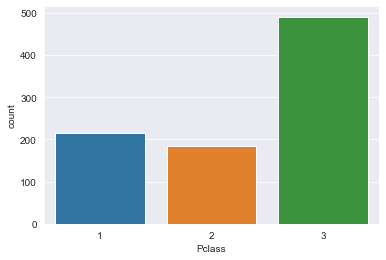

In [4]:
# survivors and class
sns.countplot(x=train["Pclass"])

<AxesSubplot:xlabel='Survived', ylabel='count'>

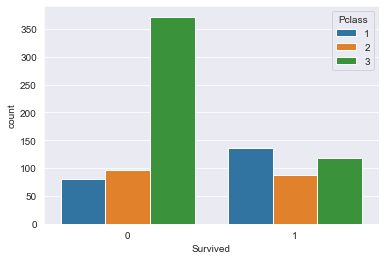

In [5]:
#survivors, class and gender
sns.countplot(x='Survived', data=train, hue = 'Pclass')

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

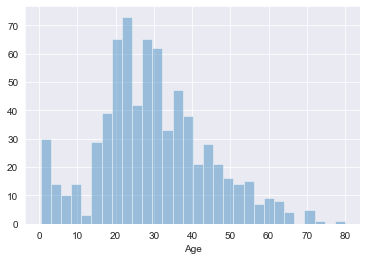

In [6]:
#distribution of the 'age' variable
sns.distplot(train['Age'], kde=False, bins=30)

<AxesSubplot:>

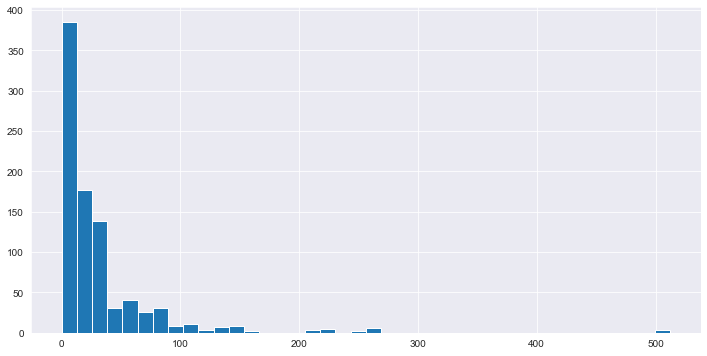

In [7]:
#fares
train['Fare'].hist(bins=40, figsize=(12,6))

#### instead of dropping missing ages, we can use imputation (filling in the mean/median age)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

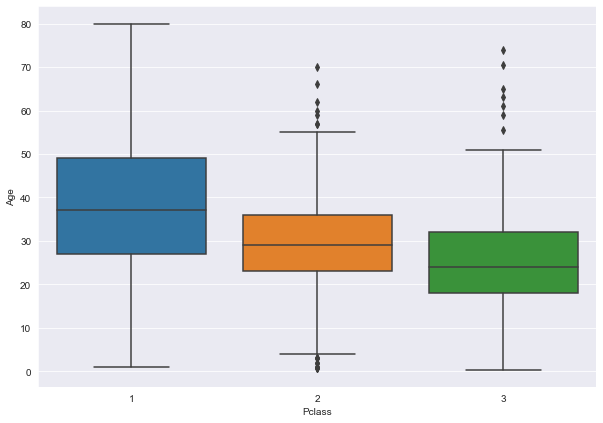

In [8]:
#mean age for each particular class
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

### Data Preprocessing

<AxesSubplot:>

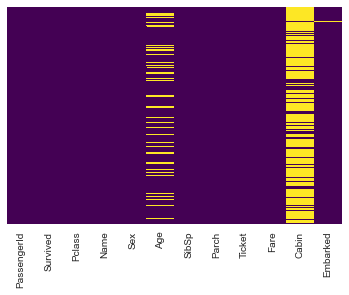

In [9]:
#working with missing data -> first we find the missing data points using a heatmap
sns.heatmap(train.isnull() , yticklabels = False, cbar = False, cmap = 'viridis' )

the yellow sections show missing data in the corresponding variable column. Since 'Age' is a numerical variable we can use the method of data imputation. For the cabin column though, it'll be better to remove the column altogether since it can't be used in a model in its present form. Maybe we could make a new categorical column based on if someone had a cabin or not, but we won't do it right now.  

In [10]:
#imputation fn
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [11]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

In [12]:
#dropping cabin column
train.drop('Cabin',axis=1,inplace=True)

In [13]:
#dropping any other null value
train.dropna(inplace=True)

step 1 complete of cleaning data, dealing with missing values. 

<AxesSubplot:>

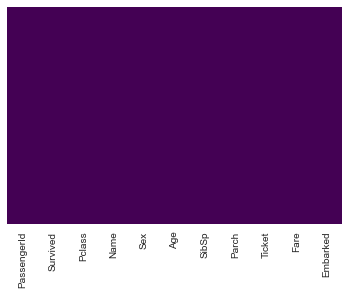

In [14]:
sns.heatmap(train.isnull() , yticklabels = False, cbar = False, cmap = 'viridis' )

### 

step 2 of cleaning data, convert categorical variables into dummy variables. so eg male == 0 and female == 1

In [15]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [16]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [17]:
#adding new columns to an existing df
train = pd.concat([train, sex, embark], axis=1)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [19]:
#dropping cols we're not using
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [20]:
train.head()#now this data is perfect for an ml algo

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Logistic Regression w/ metrics

In [22]:
X = train.drop('Survived', axis=1)#using every other var as independent
y = train['Survived']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\abc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
predictions = logmodel.predict(X_test)

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.72      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test, predictions)

array([[138,  29],
       [ 25,  75]], dtype=int64)